In [53]:
import pandas as pd
import re
import matplotlib.pyplot as plt

# Read the list of filenames from the configuration file
with open('file_list.txt', 'r', encoding='utf-8') as config_file:
    file_names = config_file.read().splitlines()

# Regex pattern to match the data format
pattern = r'\[(.*?)\] (.*?): (.*)'


# Initialize an empty list to store parsed data
datalist = []
stream_count = 0
# Iterate over each specified file
for file in file_names:
    full_path = file
    with open(full_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
        for line in lines:
            match = re.match(pattern, line)
            if match:
                date, user, message = match.groups()
                datalist.append([date, user, message,stream_count])
    stream_count = stream_count + 1

# Create a DataFrame from the parsed data
data = pd.DataFrame(datalist, columns=["date", "user", "message","stream"])

data['date'] = pd.to_datetime(data['date'])

data = data.sort_values(by=['user', 'date'])

#mods: 1206paul_, aloddin, balintboss, banties1g, devilleboi, fossabot, gkey, hueqi, ivana_10, ivanonmyown, klimzaa, martin_gales, moki1g, nightbot, ravenbtw, streamelements, substen.

data2 = data[data['user'] == '1206paul_']
#data2 = data[data['user'] == 'Aloddin']
#data2 = data[data['user'] == 'klimzaa']
#data2 = data[data['user'] == 'balintboss']
#data2 = data[data['user'] == 'Banties1g']
#data2 = data[data['user'] == 'devilleboi']
#data2 = data[data['user'] == 'fossabot']
#data2 = data[data['user'] == 'gkey']
#data2 = data[data['user'] == 'Hueqi']
#data2 = data[data['user'] == 'IvanOnMyOwn']
#data2 = data[data['user'] == 'Ivana_10']
#data2 = data[data['user'] == 'Martin_Gales']

#data2 = data[data['user'] == 'moki1g']
#data2 = data[data['user'] == 'nightbot']
#data2 = data[data['user'] == 'Ravenbtw']
#data2 = data[data['user'] == 'StreamElements']
#data2 = data[data['user'] == 'Substen']

#vips: 1SKELTON, fartnado2020, kloakpojken, kuddo_, nate_001_, ojov, pfftsmh, spinglebob, thebigdogjay, Typhu25, wasabi__ttv.

#data2 = data[data['user'] == 'Typhu25']
#data2 = data[data['user'] == 'fartnado2020']
#data2 = data[data['user'] == 'wasabi__ttv']
#data2 = data[data['user'] == '1SKELTON']
#data2 = data[data['user'] == 'pfftsmh']
#data2 = data[data['user'] == 'spinglebob']


#data2 = data[data['user'] == 'Trizze']
#data2 = data[data['user'] == 'MatthewTheTaxCollector']




# Calculate the total number of messages per stream
total_messages_per_stream = data2['stream'].value_counts()

# Combine the results into a single DataFrame
stream_stats = pd.DataFrame({
    'total_messages': total_messages_per_stream
})

# Calculate the time difference between the first and last messages for each stream
watch_lengths = data2.groupby('stream')['date'].agg(lambda x: (x.max() - x.min()).total_seconds())

# Add the stream_length column to the stream_stats DataFrame
stream_stats['watch_length'] = watch_lengths

# Calculate the time difference between the first and last messages for each stream
stream_lengths = data.groupby('stream')['date'].agg(lambda x: (x.max() - x.min()).total_seconds())

# Add the stream_length column to the stream_stats DataFrame
stream_stats['stream_length'] = stream_lengths

stream_stats = stream_stats.reset_index()
stream_stats = stream_stats.sort_values(by='stream')

stream_stats.tail(10)

,stream,total_messages,watch_length,stream_length
3,73,259,19484.0,19854.0
2,74,320,16652.0,18507.0
34,75,66,7522.0,9082.0
36,76,65,17590.0,20950.0
49,77,51,14829.0,14994.0
16,78,99,12439.0,20128.0
61,79,34,18044.0,18445.0
51,80,50,16651.0,22263.0
32,81,69,22136.0,22666.0
31,82,70,21459.0,23537.0


In [54]:
data2['user'].max()

'1206paul_'

In [55]:
# Create a DataFrame with all possible stream values (0 to 80)
all_streams = pd.DataFrame({'stream': range(data['stream'].max()+1)})

# Merge the original DataFrame with the all_streams DataFrame
stream_stats = all_streams.merge(stream_stats, on='stream', how='left')

# Fill missing values with 0
stream_stats.fillna(0, inplace=True)


stream_stats.tail(5)


,stream,total_messages,watch_length,stream_length
78,78,99,12439.0,20128.0
79,79,34,18044.0,18445.0
80,80,50,16651.0,22263.0
81,81,69,22136.0,22666.0
82,82,70,21459.0,23537.0


In [56]:
stream_stats.describe()

,stream,total_messages,watch_length,stream_length
count,83.000000,83.000000,83.000000,83.000000
mean,41.000000,76.686747,14959.060241,18615.614458
std,24.103942,73.755682,6351.443029,5160.116651
min,0.000000,1.000000,0.000000,5257.000000
25%,20.500000,32.000000,11593.000000,16781.000000
50%,41.000000,58.000000,16359.000000,18507.000000
75%,61.500000,92.000000,18865.000000,21299.000000
max,82.000000,387.000000,35885.000000,36105.000000


In [57]:
stream_stats['watch_length_in_hour'] = stream_stats['watch_length'] / 60 /60
stream_stats['stream_length_in_hour'] = stream_stats['stream_length'] / 60 /60

stream_stats.head(5)

,stream,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour
0,0,70,17164.0,17697.0,4.767778,4.915833
1,1,82,15971.0,17831.0,4.436389,4.953056
2,2,88,11784.0,19147.0,3.273333,5.318611
3,3,7,2553.0,17451.0,0.709167,4.847500
4,4,93,18306.0,18734.0,5.085000,5.203889


In [58]:
stream_stats['persenteg'] = stream_stats['watch_length'] / stream_stats['stream_length'] * 100
stream_stats['persenteg'] = stream_stats['persenteg'].fillna(0)

stream_stats.head(20)

,stream,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour,persenteg
0,0,70,17164.0,17697.0,4.767778,4.915833,96.988190
1,1,82,15971.0,17831.0,4.436389,4.953056,89.568729
2,2,88,11784.0,19147.0,3.273333,5.318611,61.544890
3,3,7,2553.0,17451.0,0.709167,4.847500,14.629534
4,4,93,18306.0,18734.0,5.085000,5.203889,97.715384
5,5,27,17580.0,20382.0,4.883333,5.661667,86.252576
6,6,4,12123.0,16563.0,3.367500,4.600833,73.193262
7,7,20,8423.0,17773.0,2.339722,4.936944,47.392112
8,8,50,18471.0,18686.0,5.130833,5.190556,98.849406
9,9,9,3140.0,16418.0,0.872222,4.560556,19.125350


In [59]:
stream_stats['persenteg'].describe()

count    83.000000
mean     79.500797
std      24.567085
min       0.000000
25%      73.071607
50%      89.568729
75%      96.589079
max      99.390666
Name: persenteg, dtype: float64

In [60]:
stream_stats = stream_stats.sort_values(by='persenteg')

stream_stats.head(10)

,stream,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour,persenteg
56,56,1,0.0,16004.0,0.000000,4.445556,0.000000
58,58,6,1641.0,17445.0,0.455833,4.845833,9.406707
10,10,21,818.0,8327.0,0.227222,2.313056,9.823466
52,52,7,1525.0,12221.0,0.423611,3.394722,12.478521
3,3,7,2553.0,17451.0,0.709167,4.847500,14.629534
9,9,9,3140.0,16418.0,0.872222,4.560556,19.125350
57,57,9,6957.0,21863.0,1.932500,6.073056,31.820885
34,34,15,9267.0,22676.0,2.574167,6.298889,40.866996
28,28,53,7369.0,17430.0,2.046944,4.841667,42.277682
7,7,20,8423.0,17773.0,2.339722,4.936944,47.392112


In [61]:
stream_stats['watch_length_in_hour'].sum() /24

14.37039351851852

In [62]:

stream_stats.head(10)

,stream,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour,persenteg
56,56,1,0.0,16004.0,0.000000,4.445556,0.000000
58,58,6,1641.0,17445.0,0.455833,4.845833,9.406707
10,10,21,818.0,8327.0,0.227222,2.313056,9.823466
52,52,7,1525.0,12221.0,0.423611,3.394722,12.478521
3,3,7,2553.0,17451.0,0.709167,4.847500,14.629534
9,9,9,3140.0,16418.0,0.872222,4.560556,19.125350
57,57,9,6957.0,21863.0,1.932500,6.073056,31.820885
34,34,15,9267.0,22676.0,2.574167,6.298889,40.866996
28,28,53,7369.0,17430.0,2.046944,4.841667,42.277682
7,7,20,8423.0,17773.0,2.339722,4.936944,47.392112


In [63]:
stream_stats.tail(10)

,stream,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour,persenteg
79,79,34,18044.0,18445.0,5.012222,5.123611,97.825969
30,30,154,10450.0,10681.0,2.902778,2.966944,97.837281
21,21,124,17106.0,17472.0,4.751667,4.853333,97.905220
70,70,153,17650.0,18002.0,4.902778,5.000556,98.044662
73,73,259,19484.0,19854.0,5.412222,5.515000,98.136396
17,17,92,14455.0,14719.0,4.015278,4.088611,98.206400
62,62,139,11563.0,11766.0,3.211944,3.268333,98.274690
8,8,50,18471.0,18686.0,5.130833,5.190556,98.849406
77,77,51,14829.0,14994.0,4.119167,4.165000,98.899560
26,26,387,35885.0,36105.0,9.968056,10.029167,99.390666


In [64]:
stream_stats = stream_stats.sort_values(by='stream')
stream_stats.tail(10)

,stream,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour,persenteg
73,73,259,19484.0,19854.0,5.412222,5.515000,98.136396
74,74,320,16652.0,18507.0,4.625556,5.140833,89.976766
75,75,66,7522.0,9082.0,2.089444,2.522778,82.823167
76,76,65,17590.0,20950.0,4.886111,5.819444,83.961814
77,77,51,14829.0,14994.0,4.119167,4.165000,98.899560
78,78,99,12439.0,20128.0,3.455278,5.591111,61.799483
79,79,34,18044.0,18445.0,5.012222,5.123611,97.825969
80,80,50,16651.0,22263.0,4.625278,6.184167,74.792256
81,81,69,22136.0,22666.0,6.148889,6.296111,97.661696
82,82,70,21459.0,23537.0,5.960833,6.538056,91.171347


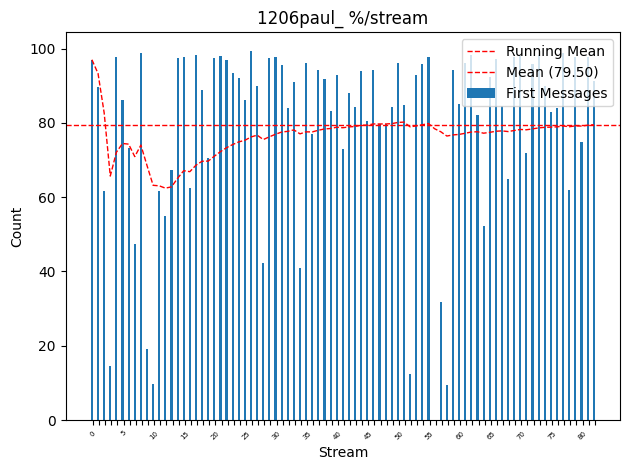

In [65]:
# Plot the chart
fig, ax = plt.subplots()

# Bar width
bar_width = 0.35

# Bar positions
index = range(len(stream_stats))

# Bar plots
bar1 = ax.bar(index, stream_stats['persenteg'], bar_width, label='First Messages')

# Calculate mean of first messages
persenteg_messages = stream_stats['persenteg'].mean()

stream_stats['persenteg_avg'] = stream_stats['persenteg'].expanding().mean()

# Plot the running mean line
ax.plot(index, stream_stats['persenteg_avg'], color='r', linestyle='--', linewidth=1, label='Running Mean')

# Draw the mean line
ax.axhline(persenteg_messages, color='r', linestyle='--', linewidth=1, label=f'Mean ({persenteg_messages:.2f})')

# Labels and title
ax.set_xlabel('Stream', fontsize=10)
ax.set_ylabel('Count', fontsize=10)
ax.set_title(data2['user'].max() + ' %/stream', fontsize=12)

# Set x-ticks and x-tick labels
ax.set_xticks([i + bar_width / 2 for i in index])
xtick_labels = ['' if i % 5 != 0 else stream_stats['stream'][i] for i in index]
ax.set_xticklabels(xtick_labels, fontsize=5)  # Adjust x-tick labels font size

# Add legend
ax.legend(fontsize=10)

# Display the plot
plt.xticks(rotation=45)  # Rotate x labels if necessary
plt.tight_layout()
plt.show()